# importer les bibliothèque 

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importer la data

In [96]:
df=pd.read_csv("kc_house_data.csv")

In [97]:
df.shape

(21613, 21)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [99]:
df["price"].mean()

540088.1417665294

# Corrélation de la dataset

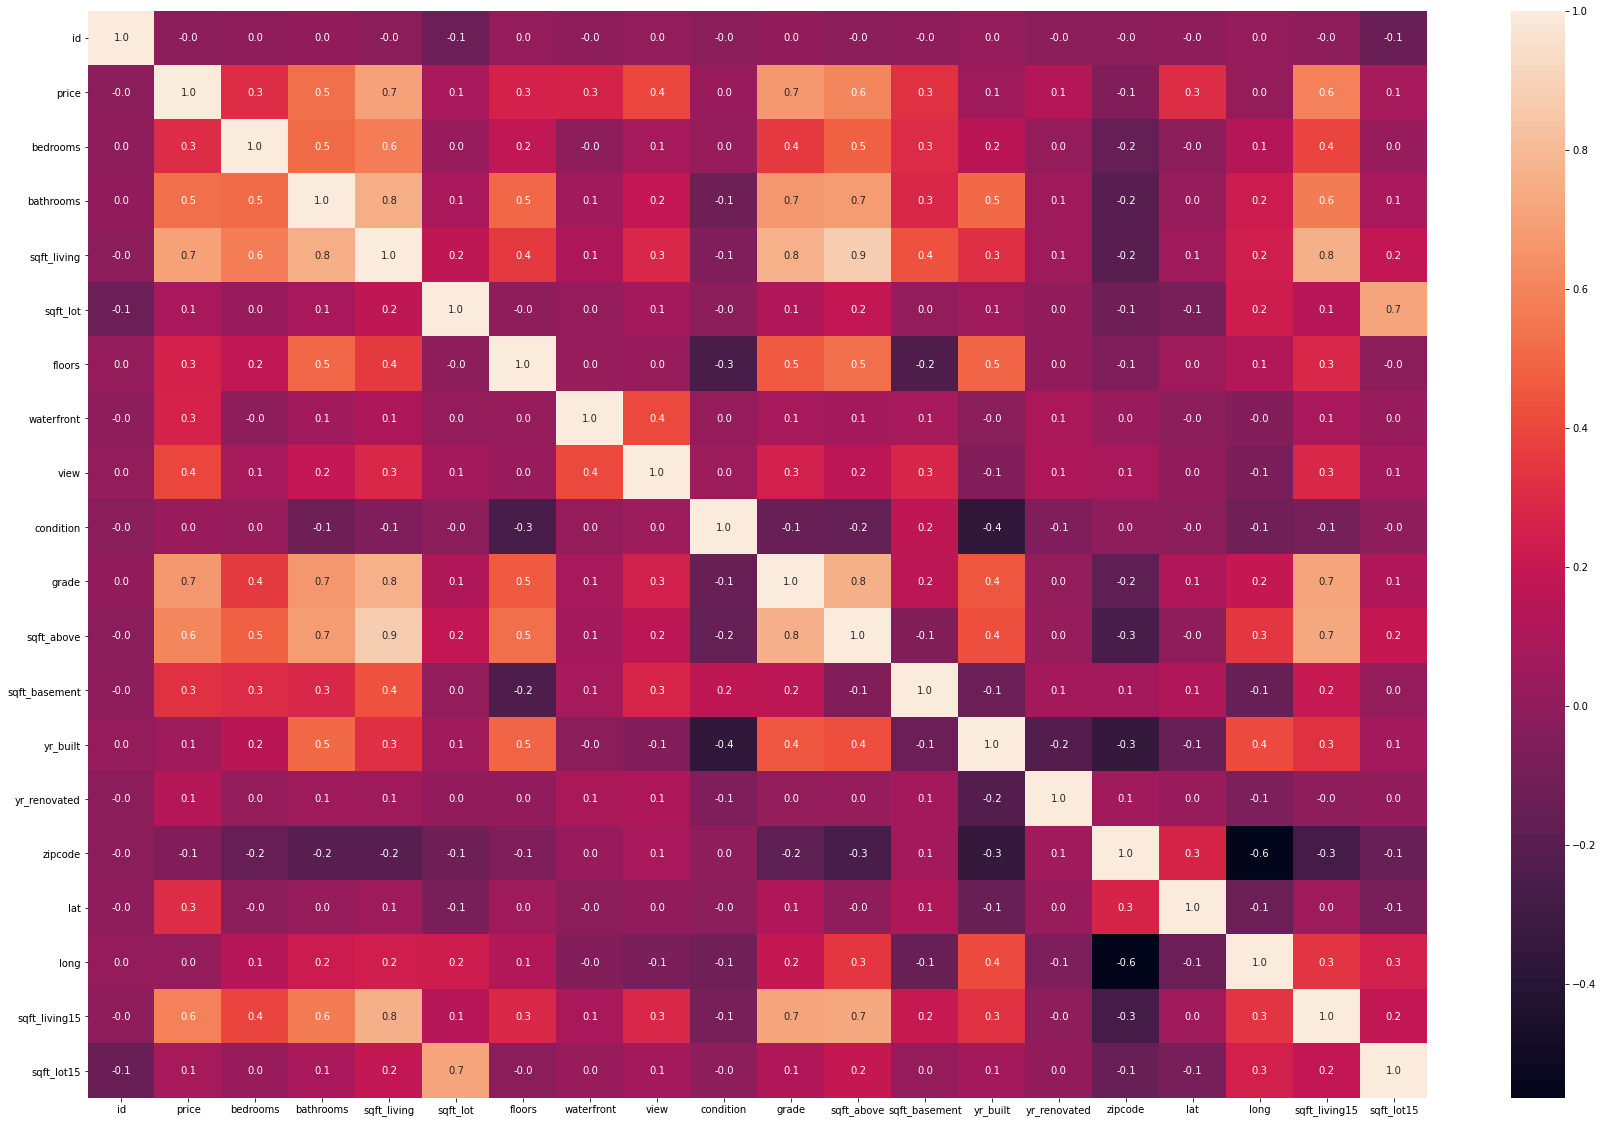

In [100]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,fmt=".1f")
plt.show()

# Regréssion linéaire simple

In [101]:
X=df.iloc[:,5].values
y=df.iloc[:,2].values

In [102]:
X=X.reshape(X.shape[0],1)
y=y.reshape(y.shape[0],1)

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [107]:
y_pred=linreg.predict(X_test)

In [108]:
y_pred

array([[216149.72108078],
       [425985.89160865],
       [624778.05316138],
       ...,
       [889834.26856502],
       [583363.01950456],
       [423224.88936487]])

In [109]:
y_test

array([[285000.],
       [631000.],
       [565000.],
       ...,
       [845000.],
       [432500.],
       [165000.]])

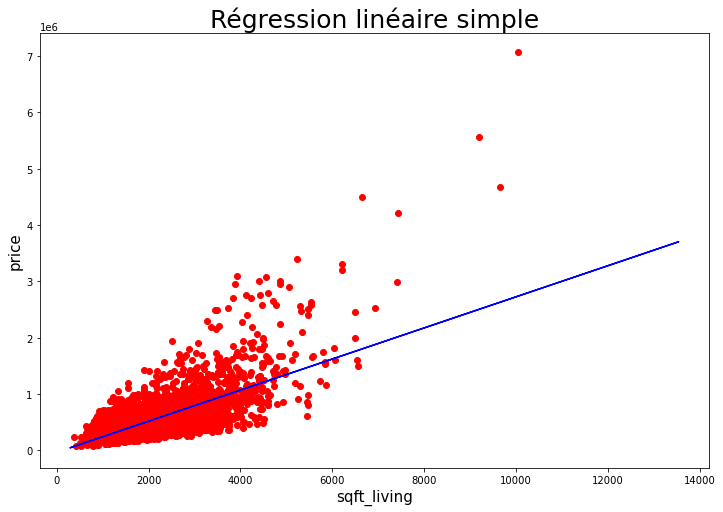

In [110]:
plt.figure(figsize=(12,8))
plt.scatter(X_test,y_test, color="red")
plt.plot(X_train,linreg.predict(X_train),color='blue')
plt.xlabel("sqft_living",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.title("Régression linéaire simple", fontsize=25)
plt.show()

In [111]:
linreg.score(X,y)

0.492718763965197

In [112]:
linreg.predict([[5000]])

array([[1345399.63879002]])

# Régréssion linéaire multiple

In [113]:
Z=df.iloc[:,[5,11,12,19]].values

In [114]:
Z_train,Z_test,y_train,y_test=train_test_split(Z,y,test_size=.2)

In [115]:
linMreg=LinearRegression()
linMreg.fit(Z_train,y_train)

LinearRegression()

In [116]:
linMreg.score(Z,y)

0.5418811926385748

In [117]:
y_predicM=linMreg.predict(Z_test)
y_predicM

array([[385669.84804811],
       [179735.64252297],
       [514453.18696005],
       ...,
       [664990.53330189],
       [409041.41486411],
       [367085.40736562]])

In [118]:
y_test

array([[545000.],
       [293000.],
       [551000.],
       ...,
       [515805.],
       [398000.],
       [450000.]])

In [119]:
Sqft_living=1982
grade=5
sqft_above=1987
sqft_living_15=1000


In [120]:
linMreg.predict([[Sqft_living,grade,sqft_above,sqft_living_15]])

array([[198300.74258876]])

# Régréssion polynomial

In [212]:
W=df.iloc[:,11].values
W=W.reshape(W.shape[0],1)

In [213]:
W_train,W_test,y_train,y_test=train_test_split(W,y,test_size=.2)

In [214]:
from sklearn.preprocessing import PolynomialFeatures

In [215]:
poly=PolynomialFeatures(degree=4)
W_poly=poly.fit_transform(W_train)
W_poly

array([[1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       ...,
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03]])

In [216]:
linPreg=LinearRegression()
linPreg.fit(W_poly,y_train)

LinearRegression()

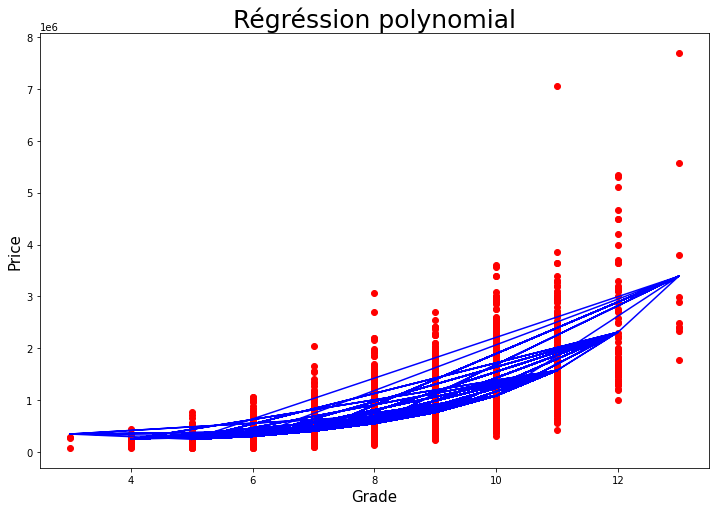

In [229]:
# Visualiser les résultats
plt.figure(figsize=(12,8))
plt.scatter(W_train, y_train, color="Red")
plt.plot(W_train, linPreg.predict(poly.fit_transform(W_train)),color="Blue")
plt.title('Régréssion polynomial',fontsize=25)
plt.xlabel('Grade',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [218]:
from sklearn import metrics

In [220]:
y_ppredict=linPreg.predict(poly.fit_transform(W_test))
y_ppredict

array([[ 301846.63216132],
       [1083404.15639126],
       [ 762361.85513557],
       ...,
       [ 549026.71777024],
       [ 762361.85513557],
       [ 762361.85513557]])

In [221]:
y_test

array([[ 215000.],
       [1450000.],
       [1365000.],
       ...,
       [ 650000.],
       [ 305950.],
       [ 471835.]])

In [222]:
linPreg.score(poly.fit_transform(W),y)

0.5174702107018754